In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

In [46]:
file_path = r"C:\Users\Nandu Gatla\Music\Heartrate\heart_rate_data.csv"  # Using uploaded file
df = pd.read_csv(file_path)

In [47]:
# Handle missing values using mean
df["Heart Rate"].fillna(df["Heart Rate"].mean(), inplace=True)
df["Label"].fillna(df["Label"].median(), inplace=True)


In [48]:
# Detecting outliers using IQR method
Q1 = df["Heart Rate"].quantile(0.25)
Q3 = df["Heart Rate"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [49]:
# Remove outliers
df_cleaned = df[(df["Heart Rate"] >= lower_bound) & (df["Heart Rate"] <= upper_bound)]


In [50]:

# Prepare features and labels
X = df_cleaned[["Heart Rate"]]
y = df_cleaned["Label"]


In [51]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
# Convert to DataFrame to handle NaNs after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=["Heart Rate"])
X_scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
X_scaled_df.dropna(inplace=True)  # Drop remaining NaNs

# Convert back to numpy array
X_scaled = X_scaled_df.to_numpy()

# Ensure labels are also cleaned to match the updated X
y = y.iloc[X_scaled_df.index]

# Remove any NaN values in labels
y = y.to_numpy()
valid_indices = ~np.isnan(y)  # Get indices where y is not NaN
X_scaled = X_scaled[valid_indices]  # Keep only valid indices in X
y = y[valid_indices]  # Keep only valid indices in y


In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [54]:
# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.56      0.53      8271
         1.0       0.49      0.44      0.46      7847

    accuracy                           0.50     16118
   macro avg       0.50      0.50      0.50     16118
weighted avg       0.50      0.50      0.50     16118



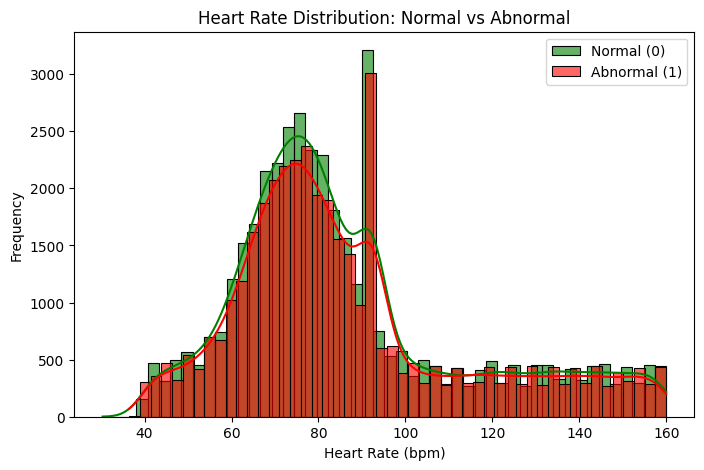

In [56]:
# Visualizing distribution
def plot_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[df_cleaned["Label"] == 0]["Heart Rate"], color="green", label="Normal (0)", kde=True, bins=50, alpha=0.6)
    sns.histplot(df_cleaned[df_cleaned["Label"] == 1]["Heart Rate"], color="red", label="Abnormal (1)", kde=True, bins=50, alpha=0.6)
    plt.legend()
    plt.title("Heart Rate Distribution: Normal vs Abnormal")
    plt.xlabel("Heart Rate (bpm)")
    plt.ylabel("Frequency")
    plt.show()

plot_distribution()

# Save cleaned dataset
df_cleaned.to_csv(r"C:\Users\Nandu Gatla\Music\Heartrate\cleaned_heart_rate_data.csv", index=False)